# Time Series Wave Height and Wave Period

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import pmdarima as pm
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import month_plot


In [2]:
#import data 
df=pd.read_csv('../Data/train_set.csv', index_col=0)

In [3]:
df.head()

,LATITUDE,LONGITUDE,DEPTH,VWH$,VCMX,VTP$,WDIR,WSPD,GSPD,WDIR.1,...,VMDSea,ETTSw,TPSw,VMDSw,MO1,MO2,HS,DMDIR,ANGSPR,INLINE
Datetime_buoy,,,,,,,,,,,,,,,,,,,,,
1988-11-22,48.83,126.0,73.0,5.420000,8.400000,11.640000,234.000000,11.800000,15.600000,225.000000,...,32.200000,0.844000,12.229000,63.700000,0.682000,0.564000,3.981000,67.000000,0.807500,0.715300
1988-11-23,48.83,126.0,73.0,6.657391,11.591304,14.960000,265.695652,7.491304,10.630435,256.086957,...,21.869565,0.661391,13.783913,76.808696,1.459913,1.249043,5.604522,52.469565,0.771422,0.673013
1988-11-24,48.83,126.0,73.0,4.434286,7.861905,15.097143,187.095238,6.809524,9.252381,177.619048,...,68.300000,1.774143,14.318143,75.528571,2.440857,1.881714,7.755571,75.142857,0.850457,0.765200
1988-11-25,48.83,126.0,73.0,3.676087,6.047826,13.973913,200.956522,6.026087,8.152174,191.739130,...,44.073913,1.157522,14.076913,88.278261,0.799304,0.618565,4.529000,87.786957,0.859587,0.789322
1988-11-26,48.83,126.0,73.0,3.114091,5.440909,11.930909,236.500000,5.613636,7.395455,227.227273,...,79.350000,0.711591,13.506682,76.372727,0.769818,0.690773,4.112773,89.922727,0.819845,0.757150


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7345 entries, 1988-11-22 to 2008-12-31
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LATITUDE   7345 non-null   float64
 1   LONGITUDE  7345 non-null   float64
 2   DEPTH      7345 non-null   float64
 3   VWH$       7345 non-null   float64
 4   VCMX       7345 non-null   float64
 5   VTP$       7345 non-null   float64
 6   WDIR       7345 non-null   float64
 7   WSPD       7345 non-null   float64
 8   GSPD       7345 non-null   float64
 9   WDIR.1     7345 non-null   float64
 10  WSPD.1     7345 non-null   float64
 11  GSPD.1     7345 non-null   float64
 12  ATMS       7345 non-null   float64
 13  DRYT       7345 non-null   float64
 14  SSTP       7345 non-null   float64
 15  YEAR       7345 non-null   float64
 16  WD         7345 non-null   float64
 17  WS         7345 non-null   float64
 18  ETOT       7345 non-null   float64
 19  TP         7345 non-null   float64
 20

In [5]:
wave_period_data = df[['VTP$']].copy()

In [6]:
wave_height_data =df[['VWH$']].copy()

<Axes: xlabel='Datetime_buoy'>

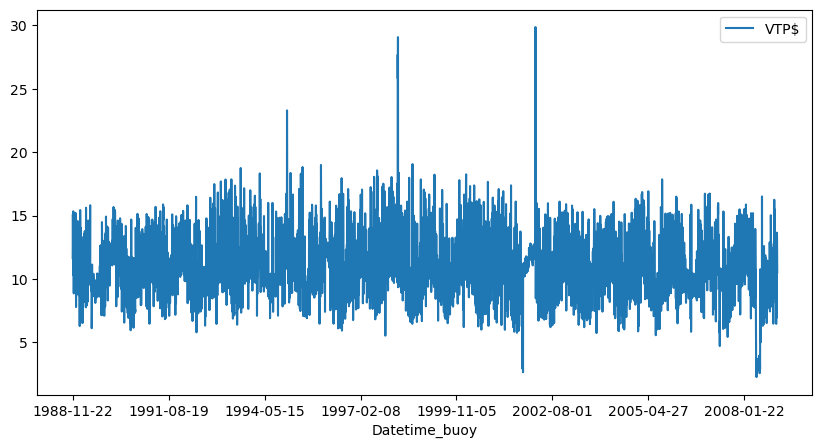

In [7]:
wave_period_data.plot(figsize=(10,5))

<Axes: xlabel='Datetime_buoy'>

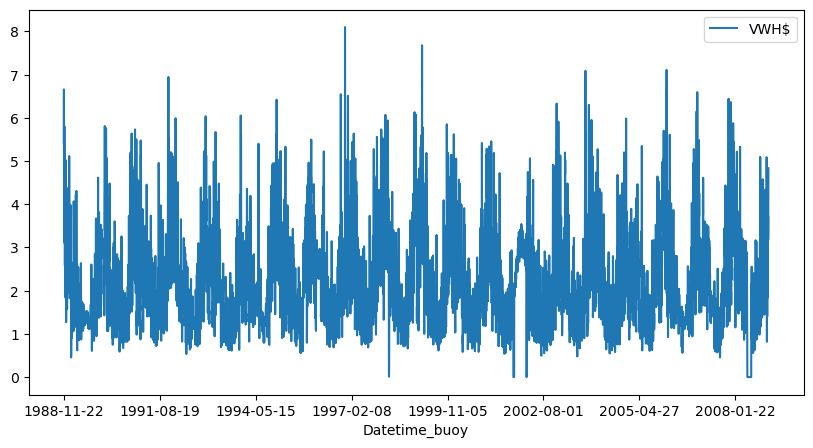

In [8]:
wave_height_data.plot(figsize=(10,5))

## Wave Height Time Series auto SARIMA

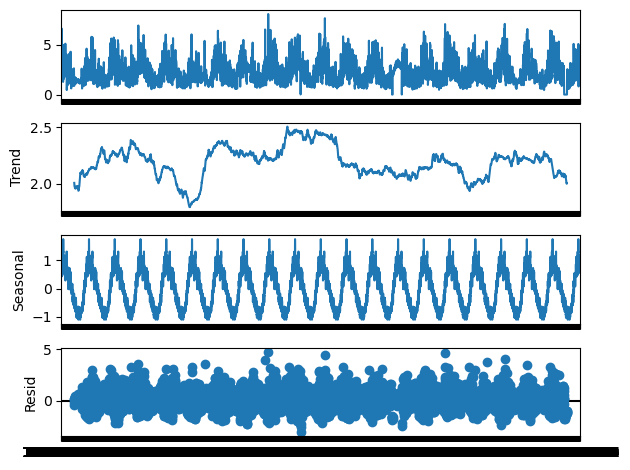

In [9]:
#decompose
result_decomp = seasonal_decompose(wave_height_data, period=365)
result_decomp.plot() #will show entire time range of data set
plt.show()

In [10]:
#AD fuller test for stationarity
result_adf = adfuller(wave_height_data['VWH$'])

test_statistic= result_adf[0]
p_val = result_adf[1]
print(f'Test Statistic: {test_statistic}')
print(f'P-Value: {p_val}')

Test Statistic: -6.841972357732181
P-Value: 1.7817266338021194e-09


Appears that series is stationary according to ADF test. 

Appears that there are stable seasonal pattersn that repeat. Use an Additive model, since using auto SARIMA from the pyramid library, this will find the optimal model, so addititive or multiplicative does not need to be specified. 

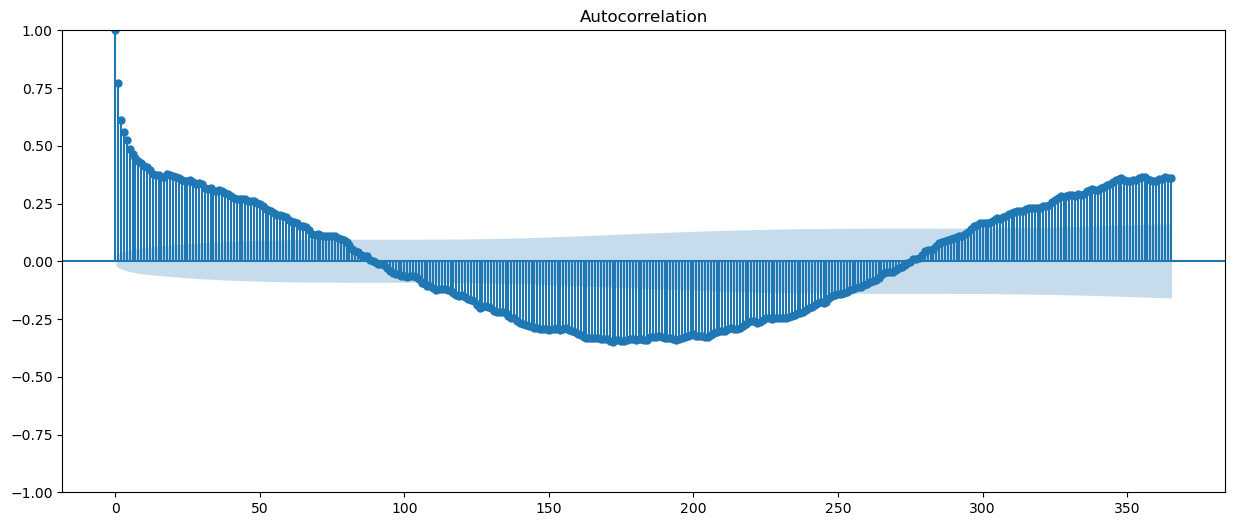

In [11]:
lags= 365
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(wave_height_data,lags=lags,ax=ax)
plt.show()

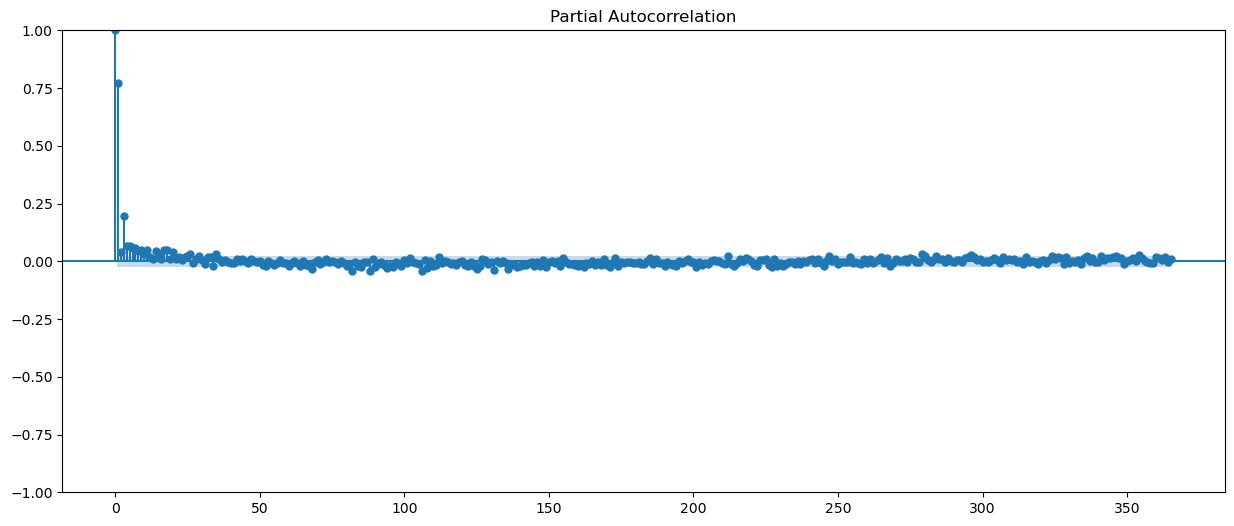

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(wave_height_data,lags=lags,ax=ax)
plt.show()

In [16]:
wave_height_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7345 entries, 1988-11-22 to 2008-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWH$    7345 non-null   float64
dtypes: float64(1)
memory usage: 114.8+ KB


In [17]:
wave_height_data.index = wave_height_data.index.astype('datetime64[ns]')

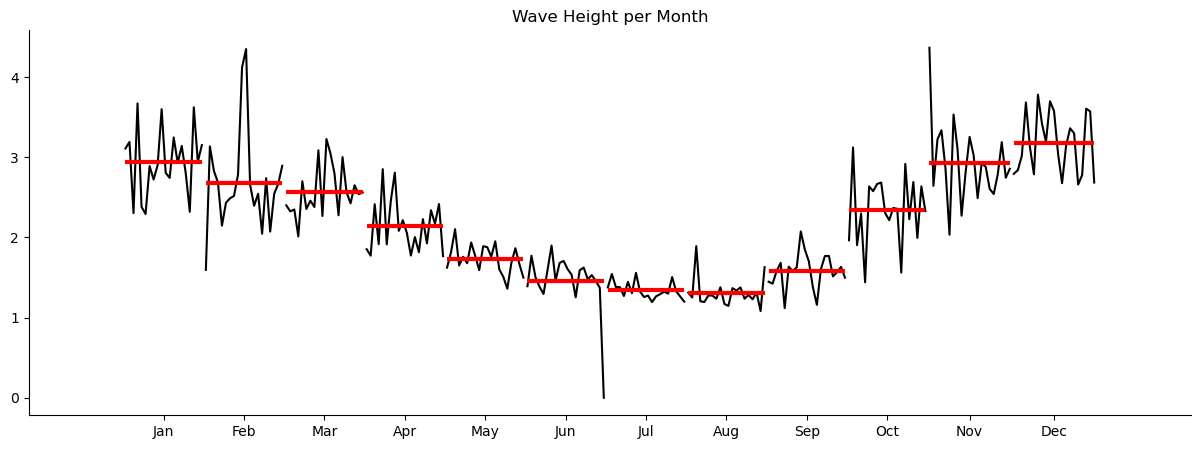

In [20]:
#create month plot of wave height
monthly_wh_data = wave_height_data['VWH$'].resample('M').mean()

plt.figure(figsize=(15, 5))

# create the seasonal plot
month_plot(monthly_wh_data, ax=plt.gca())

plt.title("Wave Height per Month")
sns.despine()
plt.show()

In [29]:
def auto_sarima_with_predictions_rolling(train_data, target_column, m=365, forecast_days=1):
    """
     
    Params:
    -  train_data: DataFrame, the training time series set.
    - target_column: name of target column
    - forecast_days: how many days to forecast

    Returns:
    - plots results
    - model diagnostics
    - MSE float for training set
    - MAPE float for training set
    - forecast_train: array containing predicted values
    """

    # Fit auto SARIMA model
    model = auto_arima(train_data[target_column], seasonal=True, m=m, suppress_warnings=True, stepwise=True)

    # Initialize lists to store results
    forecast_train = []
    mse_train = []

    # Perform rolling forecast
    for i in range(len(train_data)):
        # Predict one day ahead
        forecast_point = model.predict(n_periods=forecast_days)

        # Update the model with the latest data point
        model.update(train_data[target_column].iloc[i:i+1])

        # Append results
        forecast_train.extend(forecast_point)
        mse_train.append(mean_squared_error(train_data[target_column].iloc[:i+1], forecast_train))

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data[target_column], label='Actual', marker='o')
    plt.plot(train_data.index, forecast_train, label='Predicted', marker='o')
    plt.title('Auto SARIMA - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

    # Calculate MSE
    mse_train_final = mean_squared_error(train_data[target_column], forecast_train)
    print(f'Mean Squared Error (Training Set): {mse_train_final}')

    # Calculate MAPE
    mape_train_final = np.mean(np.abs((train_data[target_column] - forecast_train) / train_data[target_column])) * 100
    print(f'Mean Absolute Percentage Error (Training Set): {mape_train_final}')

    # Plot residuals
    residuals = train_data[target_column] - forecast_train
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, residuals, label='Residuals', marker='o', color='red')
    plt.axhline(y=0, color='black', linestyle='--', label='Zero Residuals')
    plt.title('Auto SARIMA - Residuals (Training Set)')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

    # Plot diagnostics
    model.plot_diagnostics()

    return forecast_train, mse_train_final, mape_train_final, model


In [30]:
#Use function to run SARIMA on waveheight: 
wh_model1 = auto_sarima_with_predictions_rolling(wave_height_data,'VWH$')

KeyboardInterrupt: 